In [1]:
from phidl import Device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.utilities as pu
import layout
import numpy as np

In [2]:
chip_name = 'Delta'

Load process layers and save layer properties file for Klayout visualization.

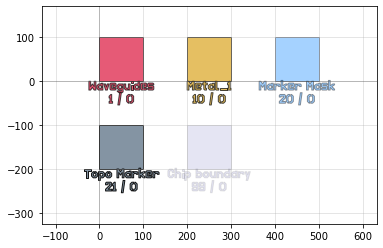

In [3]:
ls = layout.setup_layers()
P = pg.preview_layerset(ls)
qp(P)
# P.write_svg('Layers.svg')
pu.write_lyp('MyLayerSet.lyp', layerset = ls)

In [4]:
T = layout.chip(size=(9000,13000), name=chip_name, text_size=150)

In [5]:
wg_width = 1.85
ppln_len = 4000
res_radius = 150

x0 = 4500 - 2000
y0 = 2600
dy = 850

pp = 5.1*np.ones(10)
for n in range(9):
    T << layout.OPO(length=ppln_len, width=wg_width, radius=res_radius, pp=pp[n], Lc=300).move([x0,y0+n*dy])
    T << layout.contact_pads(size=[300,200], label='+'+str(n+1), label_size=50).move([x0-50-300, y0+n*dy-250])
    T << layout.contact_pads(size=[200,250], label='-'+str(n+1), label_size=50).move([x0+4000+100, y0+n*dy-300])
    T << layout.contact_pads(size=[200,250], label='-', label_size=50).rotate(180).move([x0+2000, y0+n*dy+270])
    T << pg.rectangle([150,50], layer=10).move([x0-125,y0+n*dy-112.5])
    T << pg.rectangle([150,50], layer=10).move([x0+4000-25,y0+n*dy-112.5])
    for n2 in range(4):
        x2 = x0 + n2*1000
        y2 = y0-112.5-125 + n*dy
        T << layout.poling_region(period=pp[n], length=900).move([x2, y2])
        T << layout.contact_pads(size=[300,200], label='+'+str(n+1), label_size=50).move([x2, y2-150]) 

#Poling DOE
x2 = x0
y2 = y0-112.5-125 + 9*dy + 100
T << layout.poling_region(period=3, length=900).move([x2, y2]);
T << layout.poling_region(period=3, length=900).move([x2+1000, y2]);
T << layout.poling_region(period=3, length=900).move([x2+2000, y2]);
T << layout.contact_pads(size=[300,200], label='+3', label_size=50).move([x2, y2-150]);
T << layout.contact_pads(size=[300,200], label='+3', label_size=50).move([x2+1000, y2-150]);
T << layout.contact_pads(size=[300,200], label='+3', label_size=50).move([x2+2000, y2-150]);
T << layout.contact_pads(size=[200,300], label='-', label_size=50).rotate(180).move([x2+3200, y2+150]);

y2 = y2 + 400
T << layout.poling_region(period=2, length=900).move([x2, y2]);
T << layout.poling_region(period=2, length=900).move([x2+1000, y2]);
T << layout.poling_region(period=2, length=900).move([x2+2000, y2]);
T << layout.contact_pads(size=[300,200], label='+2', label_size=50).move([x2, y2-150]);
T << layout.contact_pads(size=[300,200], label='+2', label_size=50).move([x2+1000, y2-150]);
T << layout.contact_pads(size=[300,200], label='+2', label_size=50).move([x2+2000, y2-150]);
T << layout.contact_pads(size=[200,300], label='-', label_size=50).rotate(180).move([x2+3200, y2+150]);

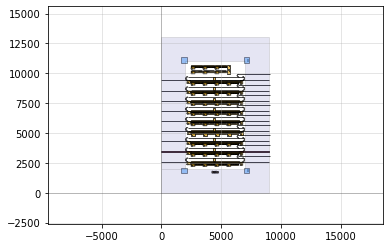

In [6]:
qp(T)

In [7]:
T.write_gds(chip_name + '.gds')

'Delta.gds'